<a href="https://colab.research.google.com/github/Requenamar3/datawrangling/blob/main/CityOfChicagoCrashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# API endpoint URL
url = 'https://data.cityofchicago.org/resource/85ca-t3if.json'

# Make a GET request to the API
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    # Convert JSON response to a pandas DataFrame
    data = pd.DataFrame(response.json())

    # Save the DataFrame to a CSV file
    data.to_csv('output.csv', index=False)
else:
    print(f"Failed to fetch data: {response.status_code}")

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt
#!pip unfreeze requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('display.max_columns', None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.23.5
1.2.2


In [ ]:
# Standard Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
# Import Data
df_X = pd.read_csv('/content/Traffic_Crashes_Crashes.csv')
df_X.sample(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
575217,b7e7b968d78af71f3784878dd4386d2ecf41ac97e3c38a...,NaN,12/27/2021 03:24:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",12/27/2021 04:45:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1926,W,35TH ST,912.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,0.0,15,2,12,41.830515,-87.673924,POINT (-87.673924066633 41.830515002742)
121442,22a3c219b202d9c2900041569c801bfbb8ef4f7151824e...,NaN,08/30/2019 01:58:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,$500 OR LESS,10/01/2019 09:30:00 PM,IMPROPER LANE USAGE,IMPROPER LANE USAGE,5005,S,PULASKI RD,821.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13,6,8,41.802122,-87.723271,POINT (-87.723271326934 41.802121503413)
145788,2a9d003e134e33e9b64c85532f0e85a352d7c3d8006015...,Y,11/10/2020 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",11/11/2020 12:08:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3119,W,59TH ST,824.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,3,11,41.786162,-87.701790,POINT (-87.701790412698 41.786162400639)
605719,c1f671b68c95af0a45569dcbcb08899ab8064761fc0efe...,NaN,12/02/2020 02:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",12/03/2020 05:25:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,10,N,LOREL AVE,1522.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,4,12,41.880654,-87.758889,POINT (-87.758889253651 41.880654201428)
547866,aedbbf7878ef9abbd63f1ec042134cb44311bba839ff75...,NaN,05/03/2020 01:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",05/03/2020 03:25:00 PM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",NOT APPLICABLE,1643,W,AUGUSTA BLVD,1213.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13,1,5,41.899572,-87.669004,POINT (-87.669003875645 41.899572180351)


In [ ]:
df_X.sample(5).T

,418078,605329,341042,504857,415046
CRASH_RECORD_ID,84036824b530b194710d056d7e87064bda81ca3240b572...,c1d3e40899b58329ff71e4e49706add49f4636cb1e5ec7...,6a8873b0a2a2538bc2dc22e185d5a48b727240572acda5...,a0afe1931e5ffc38cd5c4270c7c6585ddd4484885ac00e...,8301c84f8b94baec7be583427adfdc084b8110dac83e3a...
CRASH_DATE_EST_I,NaN,NaN,NaN,NaN,NaN
CRASH_DATE,09/14/2016 07:30:00 PM,03/20/2023 07:55:00 AM,07/05/2017 05:15:00 PM,06/23/2017 06:45:00 AM,11/10/2023 10:00:00 AM
POSTED_SPEED_LIMIT,30,40,35,30,30
TRAFFIC_CONTROL_DEVICE,NO CONTROLS,NO CONTROLS,TRAFFIC SIGNAL,TRAFFIC SIGNAL,STOP SIGN/FLASHER
DEVICE_CONDITION,NO CONTROLS,NO CONTROLS,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY
WEATHER_CONDITION,CLEAR,CLEAR,CLEAR,RAIN,CLEAR
LIGHTING_CONDITION,DARKNESS,DAYLIGHT,DAYLIGHT,DAWN,DAYLIGHT
FIRST_CRASH_TYPE,PARKED MOTOR VEHICLE,REAR END,REAR END,REAR END,ANGLE
TRAFFICWAY_TYPE,NOT DIVIDED,DIVIDED - W/MEDIAN BARRIER,DIVIDED - W/MEDIAN (NOT RAISED),DIVIDED - W/MEDIAN (NOT RAISED),FOUR WAY


In [ ]:
df_X.shape

(796394, 48)

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

object     31
float64    11
int64       6
dtype: int64

In [ ]:
df_X.dtypes.T

CRASH_RECORD_ID                   object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

In [ ]:
# Display categorical features
# Identify and treat any obvious data type issues.
df_X.select_dtypes(exclude="number").head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,W,OHARE ST,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",S,ASHLAND AVE,NaN,NaN,NaN,NaN,NaN,NaN,NO INDICATION OF INJURY,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,N,LONG AVE,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,W,TERMINAL ST,Y,Y,NaN,NaN,NaN,NaN,FATAL,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,W,TERMINAL ST,NaN,NaN,NaN,NaN,NaN,NaN,NO INDICATION OF INJURY,NaN


In [ ]:
df_X['CRASH_DAY_OF_WEEK'].nunique()

7

In [ ]:
df_X['CRASH_DAY_OF_WEEK'].unique()

array([6, 7, 3, 2, 1, 4, 5])

In [ ]:
df_X['CRASH_DAY_OF_WEEK'].dtypes

dtype('int64')

In [ ]:
df_X.describe(exclude='number')

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,796394,59703,796394,796394,796394,796394,796394,796394,796394,796394,796394,796394,773073,796394,182544,36789,249072,796394,796394,796394,796394,796390,796393,10402,17605,2463,4605,3575,1178,794640,790987
unique,796394,2,522097,19,8,12,6,18,20,6,7,7,3,2,2,2,2,3,604174,40,40,4,1632,2,2,2,2,4,2,5,295067
top,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,Y,12/29/2020 05:00:00 PM,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",10/12/2020 04:00:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,W,WESTERN AVE,Y,Y,Y,Y,CONSTRUCTION,Y,NO INDICATION OF INJURY,POINT (-87.905309125103 41.976201139024)
freq,1,52029,30,453106,458414,625745,510638,185181,346629,776945,589521,642112,437013,584162,173909,33442,238376,492561,12,309472,326800,284375,21696,7856,14355,1664,3575,2484,1042,685321,1277


##Numerical Features.

<Figure size 1500x400 with 0 Axes>

[Text(0, 0, 'INJURIES_UNKNOWN'),
 Text(1, 0, 'INJURIES_FATAL'),
 Text(2, 0, 'CRASH_DAY_OF_WEEK'),
 Text(3, 0, 'INJURIES_INCAPACITATING'),
 Text(4, 0, 'CRASH_MONTH'),
 Text(5, 0, 'INJURIES_REPORTED_NOT_EVIDENT'),
 Text(6, 0, 'NUM_UNITS'),
 Text(7, 0, 'INJURIES_NON_INCAPACITATING'),
 Text(8, 0, 'INJURIES_TOTAL'),
 Text(9, 0, 'CRASH_HOUR'),
 Text(10, 0, 'LANE_CNT'),
 Text(11, 0, 'POSTED_SPEED_LIMIT'),
 Text(12, 0, 'INJURIES_NO_INDICATION'),
 Text(13, 0, 'BEAT_OF_OCCURRENCE'),
 Text(14, 0, 'STREET_NO'),
 Text(15, 0, 'LONGITUDE'),
 Text(16, 0, 'LATITUDE')]

Text(0.5, 1.0, 'Unique values per frequency')

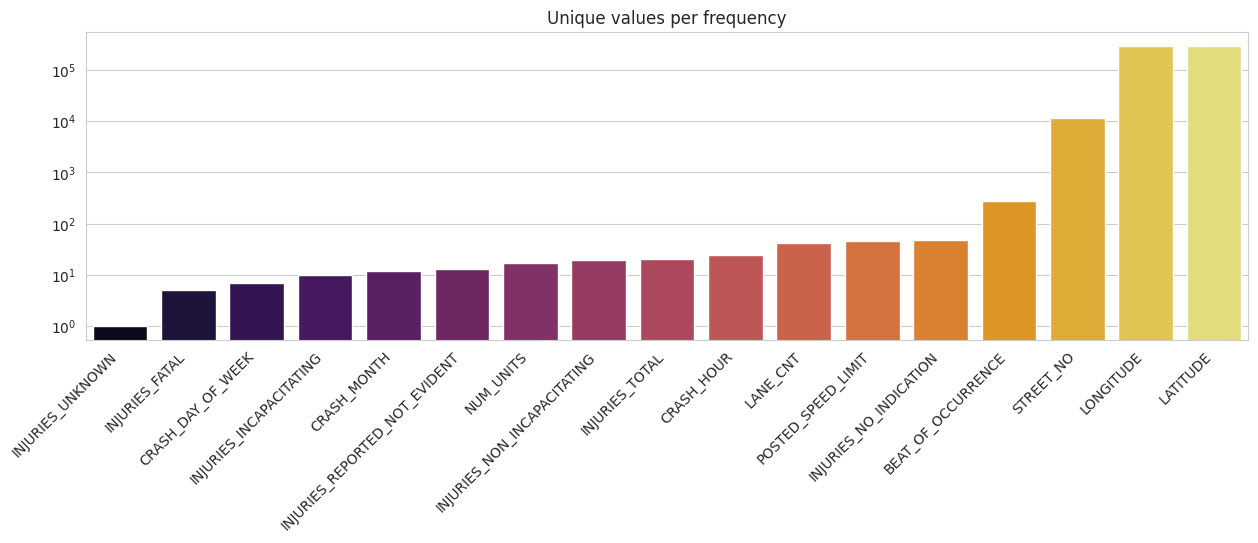

In [ ]:
# Evaluation of Numeric Features
# 2 unique values: binary
# 3 to ~ 10 unique values: ordinal (cat)
# 10+ unique values continuous
 # For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796394 entries, 0 to 796393
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                796394 non-null  object 
 1   CRASH_DATE_EST_I               59703 non-null   object 
 2   CRASH_DATE                     796394 non-null  object 
 3   POSTED_SPEED_LIMIT             796394 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         796394 non-null  object 
 5   DEVICE_CONDITION               796394 non-null  object 
 6   WEATHER_CONDITION              796394 non-null  object 
 7   LIGHTING_CONDITION             796394 non-null  object 
 8   FIRST_CRASH_TYPE               796394 non-null  object 
 9   TRAFFICWAY_TYPE                796394 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      796394 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [ ]:
df_X.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,796394.000000,1.990060e+05,796394.000000,796389.000000,796394.000000,794651.000000,794651.000000,794651.000000,794651.000000,794651.000000,794651.000000,794651.0,796394.000000,796394.000000,796394.000000,790987.000000,790987.000000
mean,28.402823,1.333032e+01,3688.140457,1242.957543,2.034902,0.189493,0.001193,0.020042,0.107031,0.061228,2.004188,0.0,13.202578,4.122447,6.778689,41.854797,-87.673462
std,6.178435,2.961623e+03,2888.016751,705.256105,0.452530,0.565733,0.037423,0.165717,0.422087,0.318549,1.158518,0.0,5.569213,1.980664,3.411065,0.337240,0.685541
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1248.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782429,-87.721711
50%,30.000000,2.000000e+00,3201.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874747,-87.674095
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924347,-87.633300
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


##Quality

In [ ]:
%time
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['CRASH_RECORD_ID'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
You seem to have 16 duplicates in your database.


In [ ]:
df_X.shape

(796394, 48)

In [ ]:
#  Extract column names of all features, except 'Accident_Index'
# you may want to remove the target as well
columns_to_consider = df_X.drop(labels=['CRASH_RECORD_ID'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X.drop_duplicates(subset=columns_to_consider, inplace=True)
df_X.shape

(796378, 48)

##Missing Values.

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.7222222222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

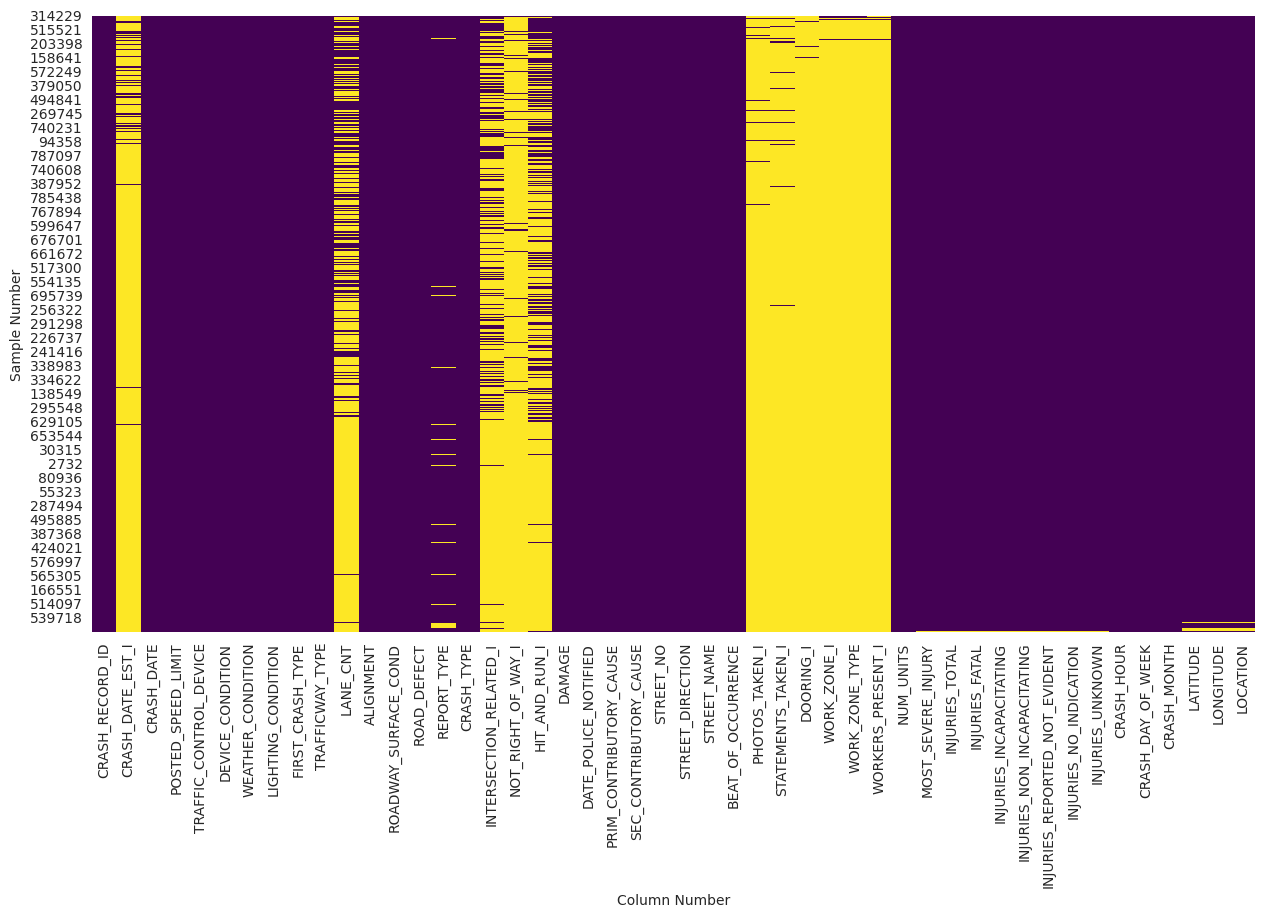

In [ ]:
# Missing Values (per sample/row)
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

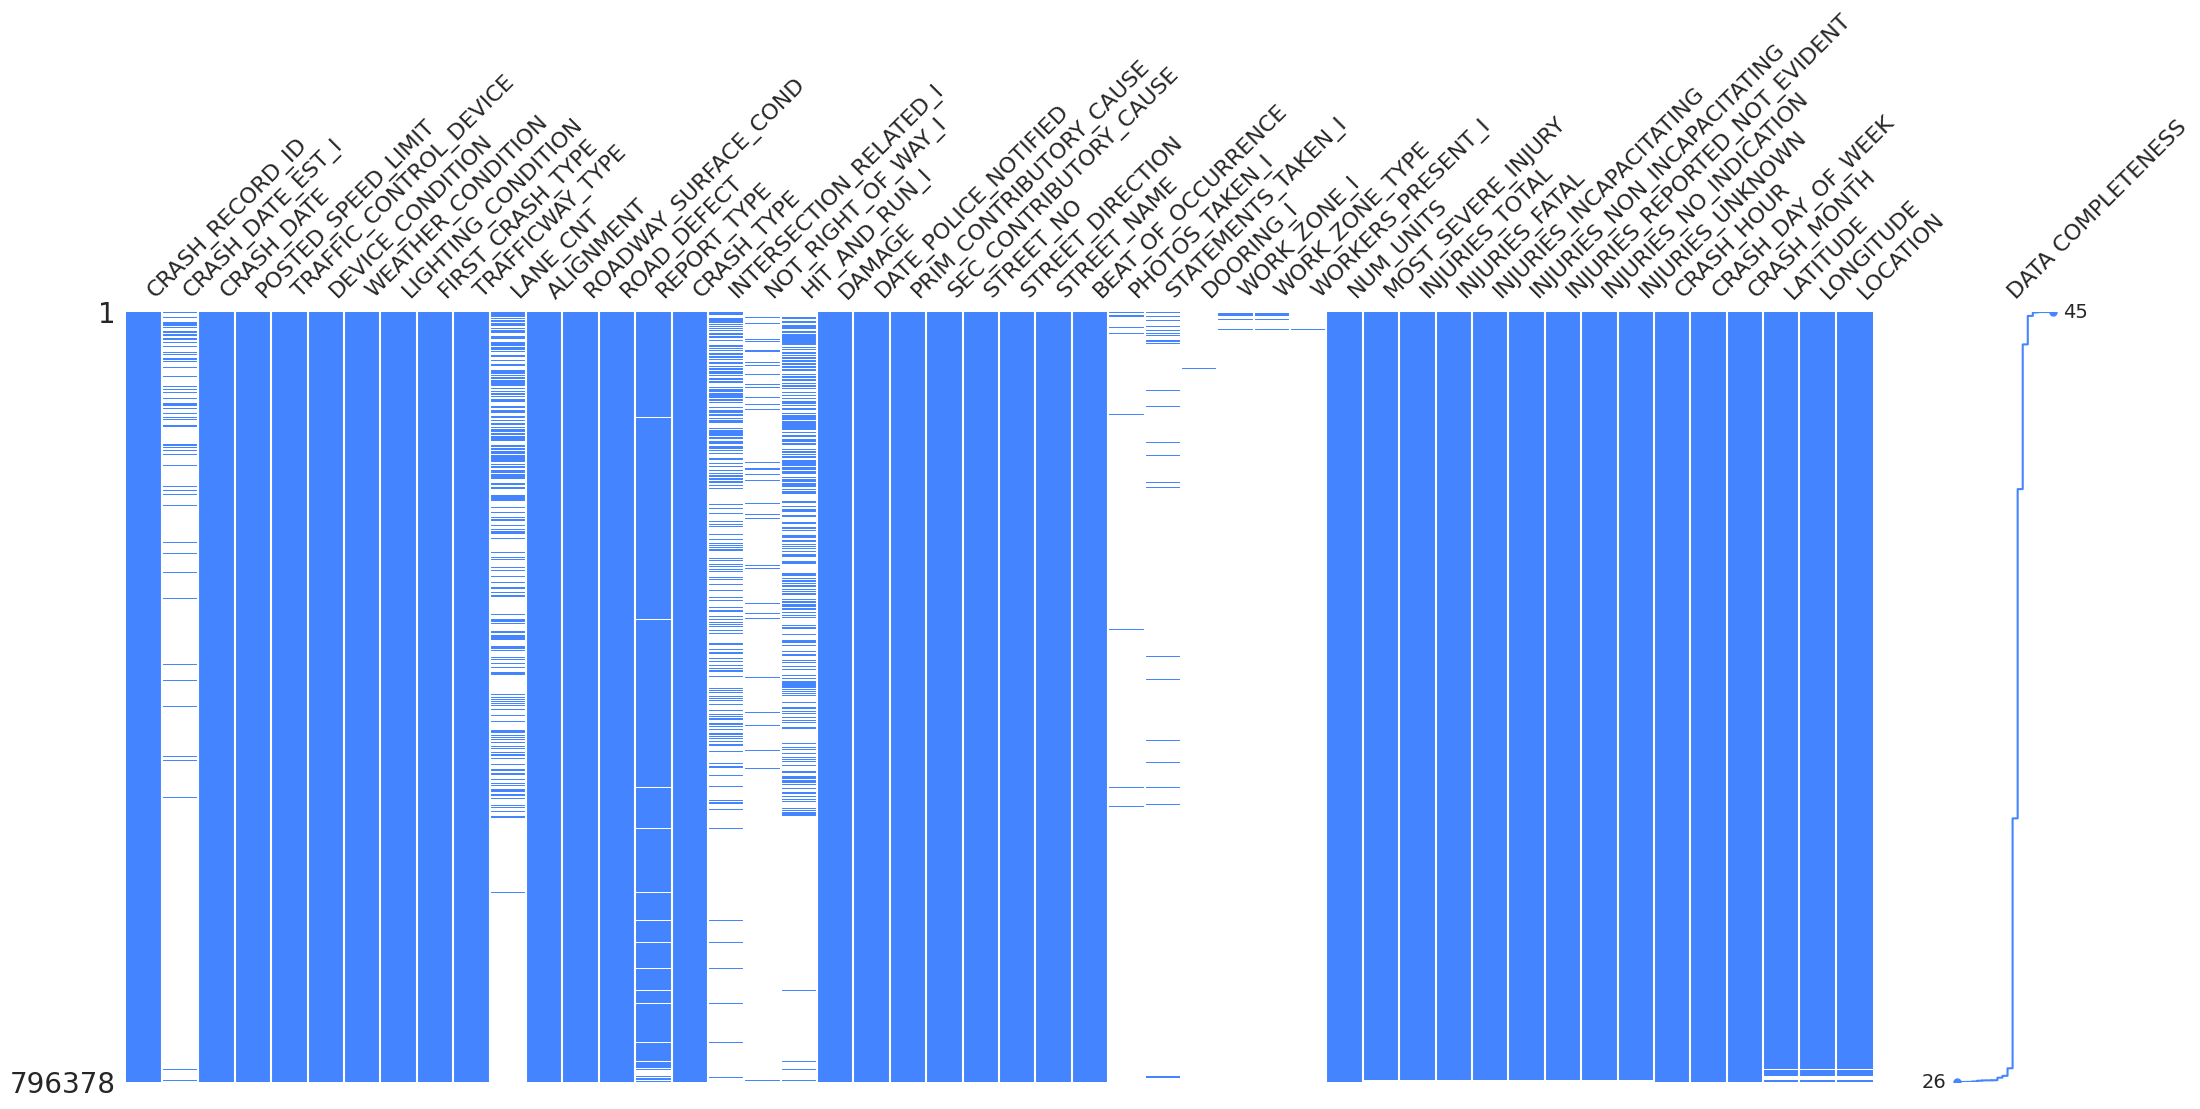

In [ ]:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Drop rows that are 20% or more empty (you set the threshold)
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(183227, 48)

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.7222222222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

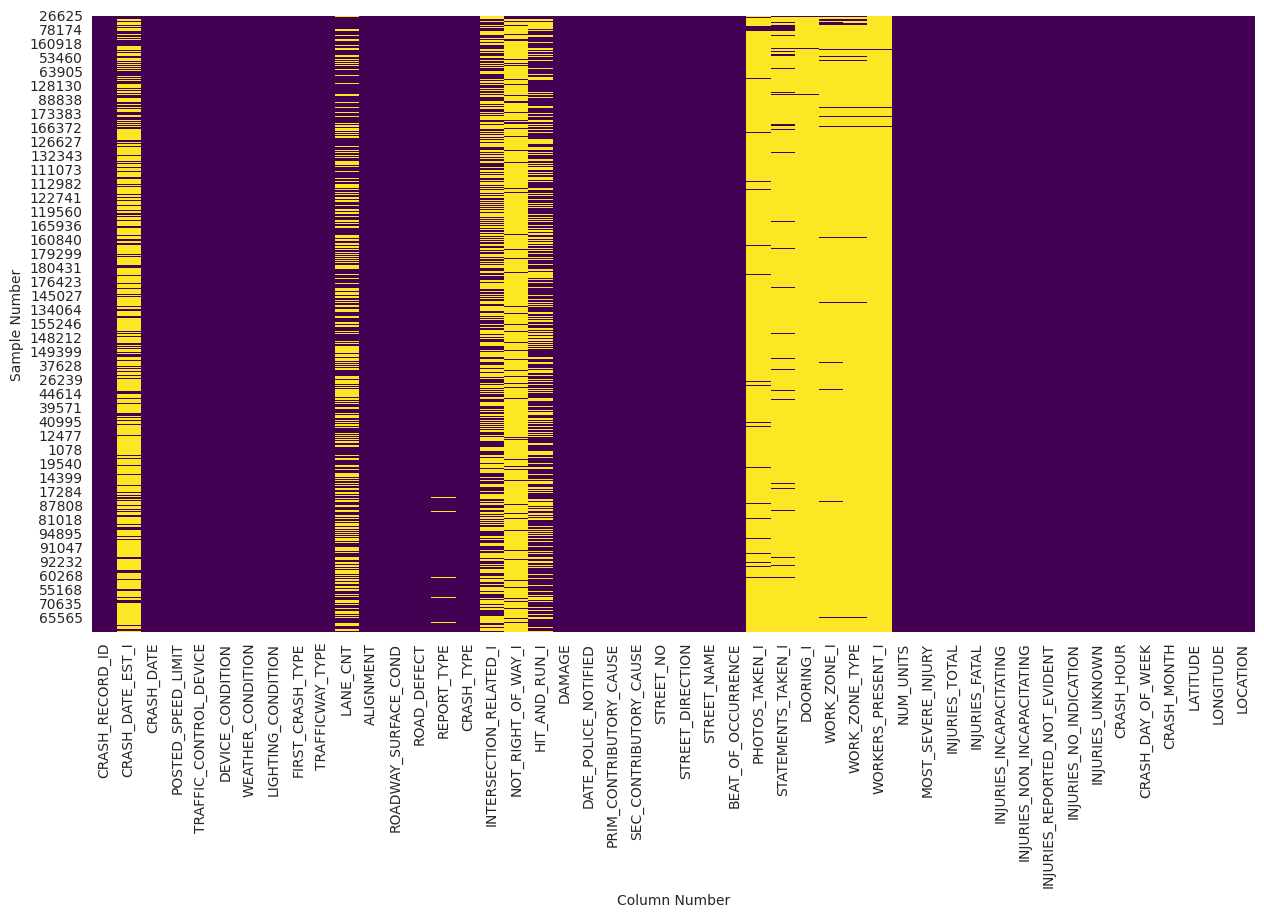

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

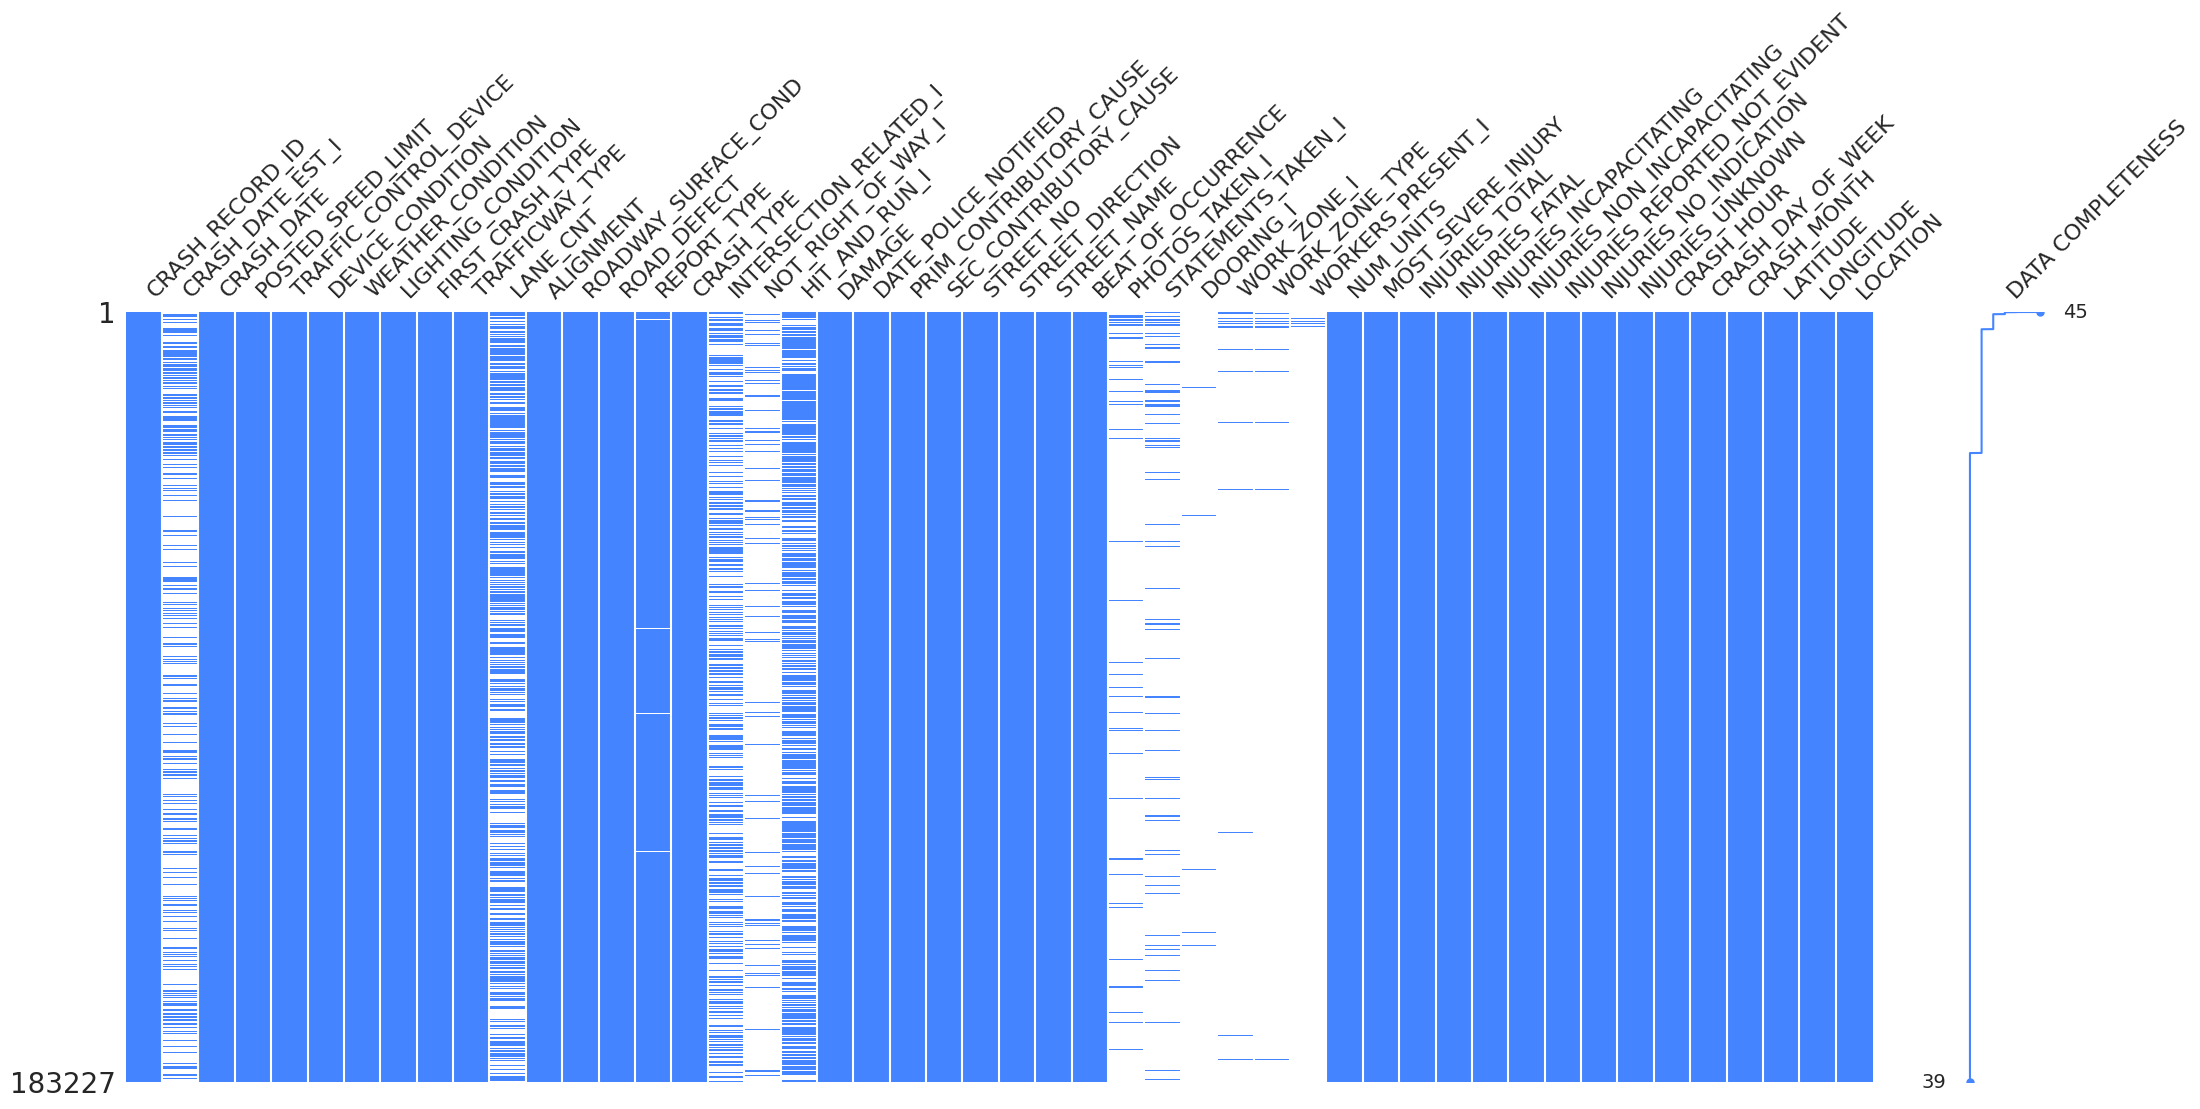

In [ ]:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(183227, 48)

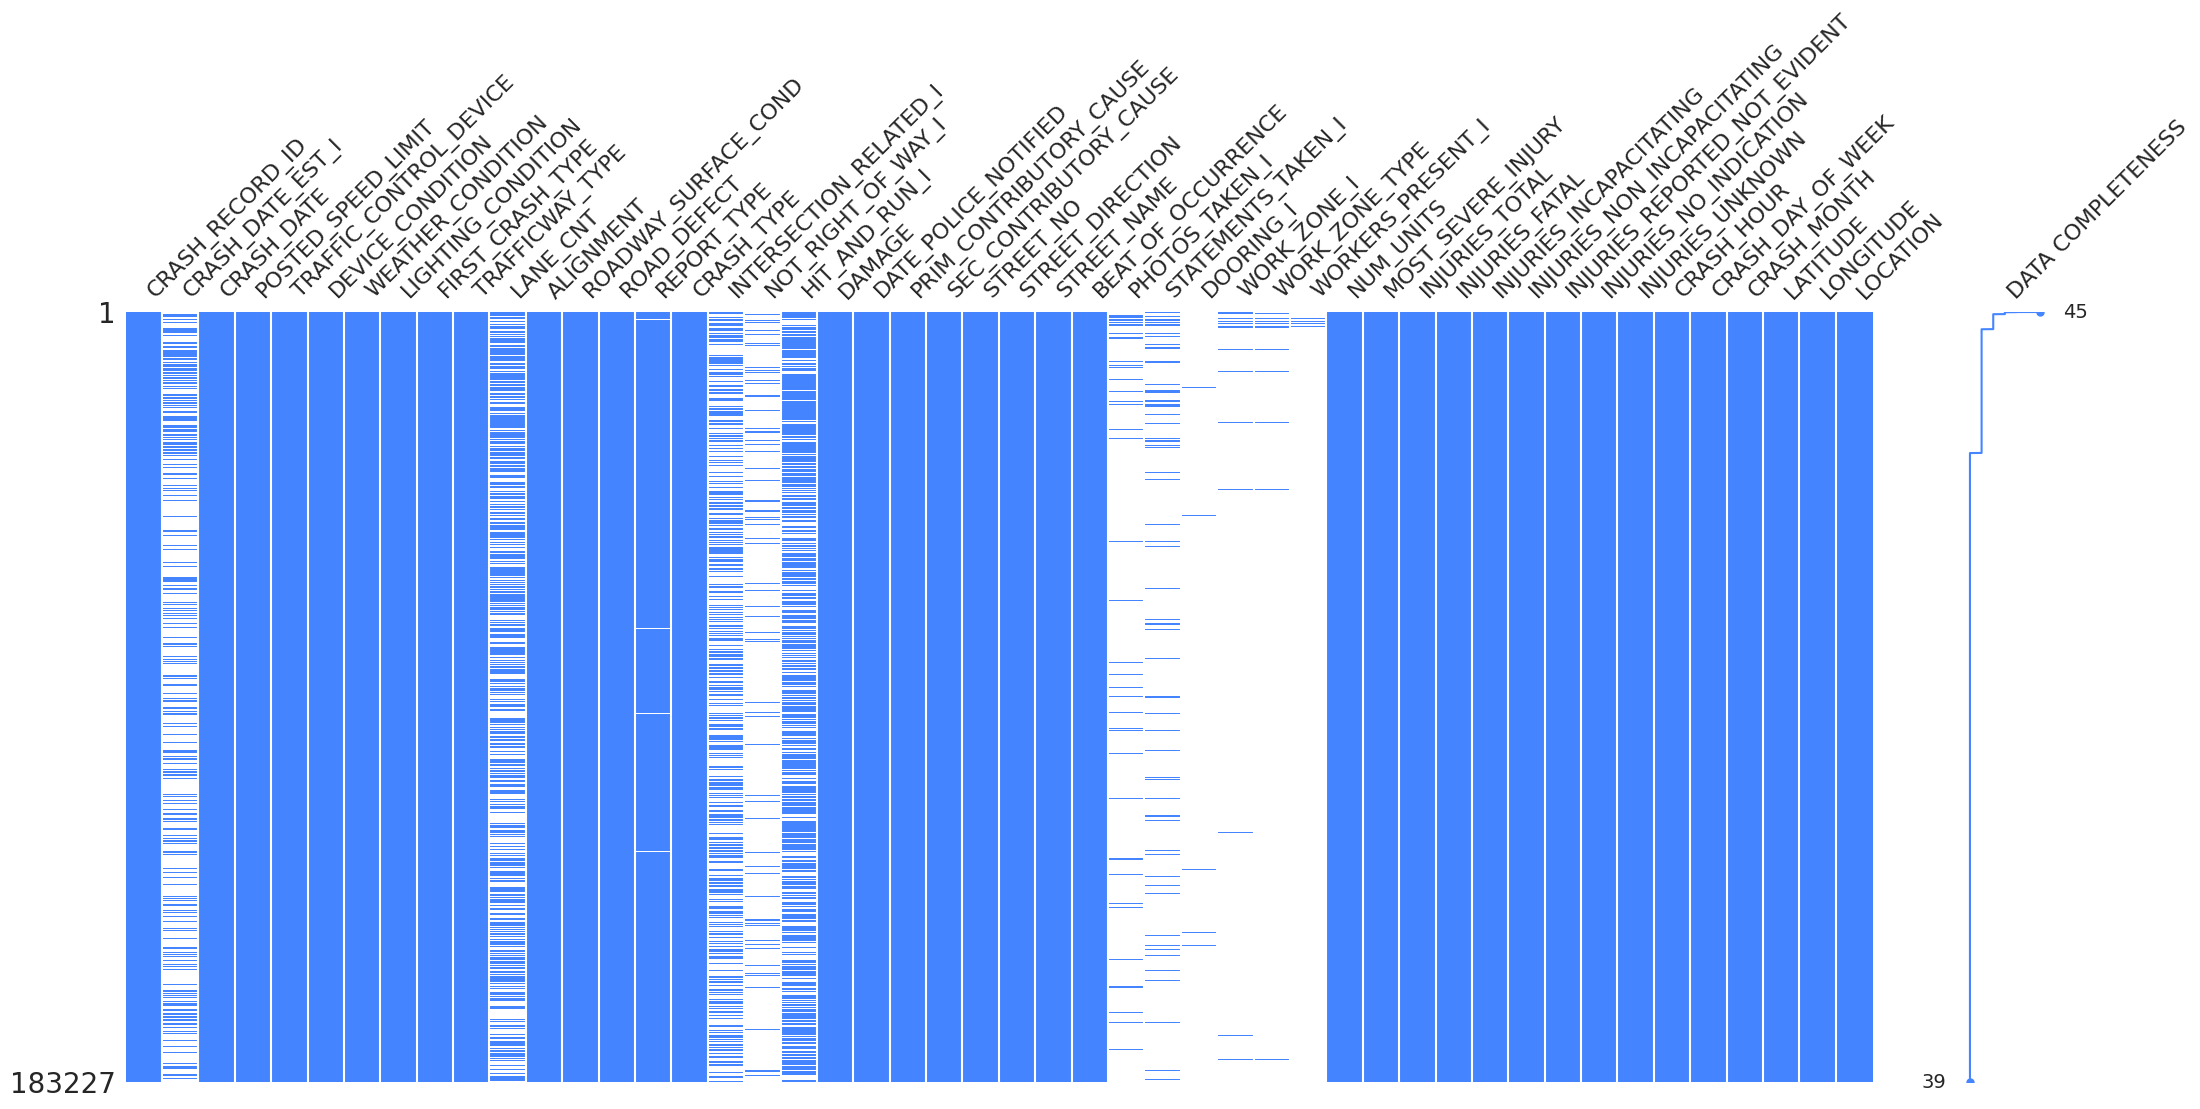

In [ ]:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

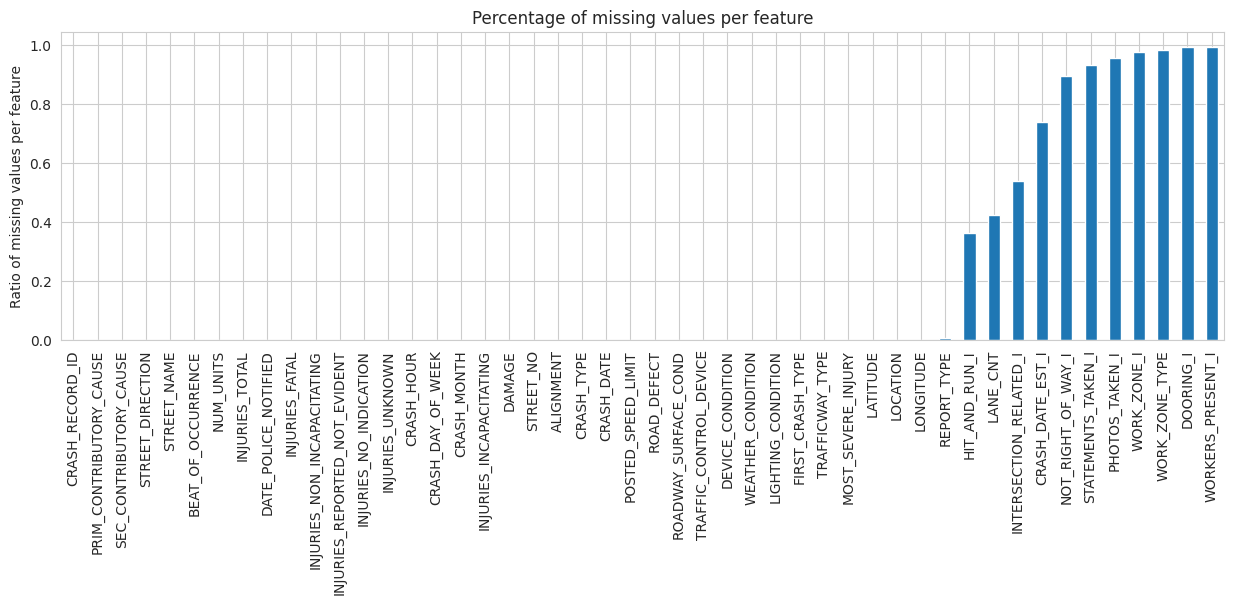

In [ ]:
# Per Feature / column
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(183227, 37)

CPU times: user 3.7 s, sys: 219 ms, total: 3.92 s
Wall time: 3.98 s


<Axes: >

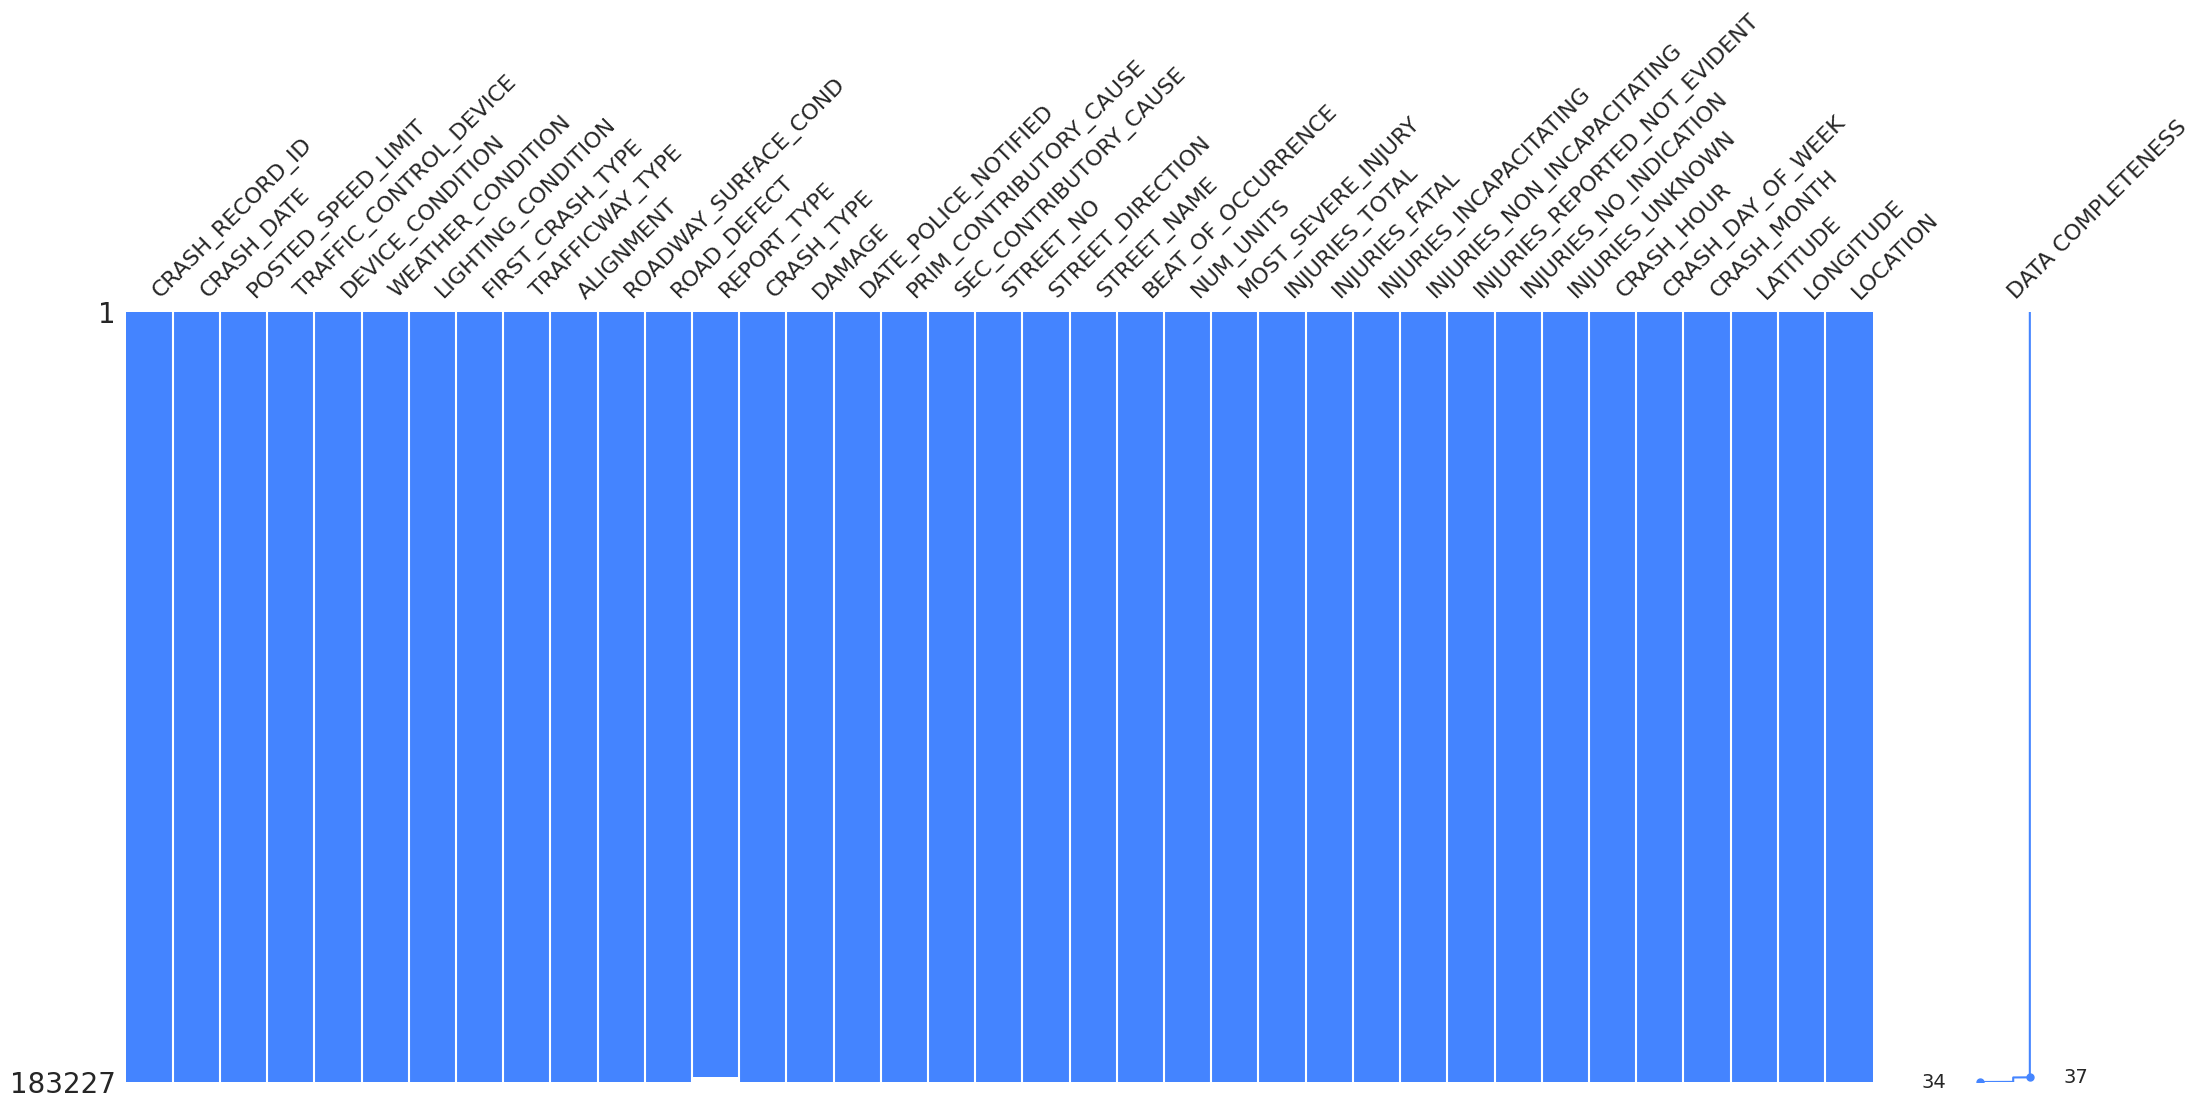

In [ ]:
%%time
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

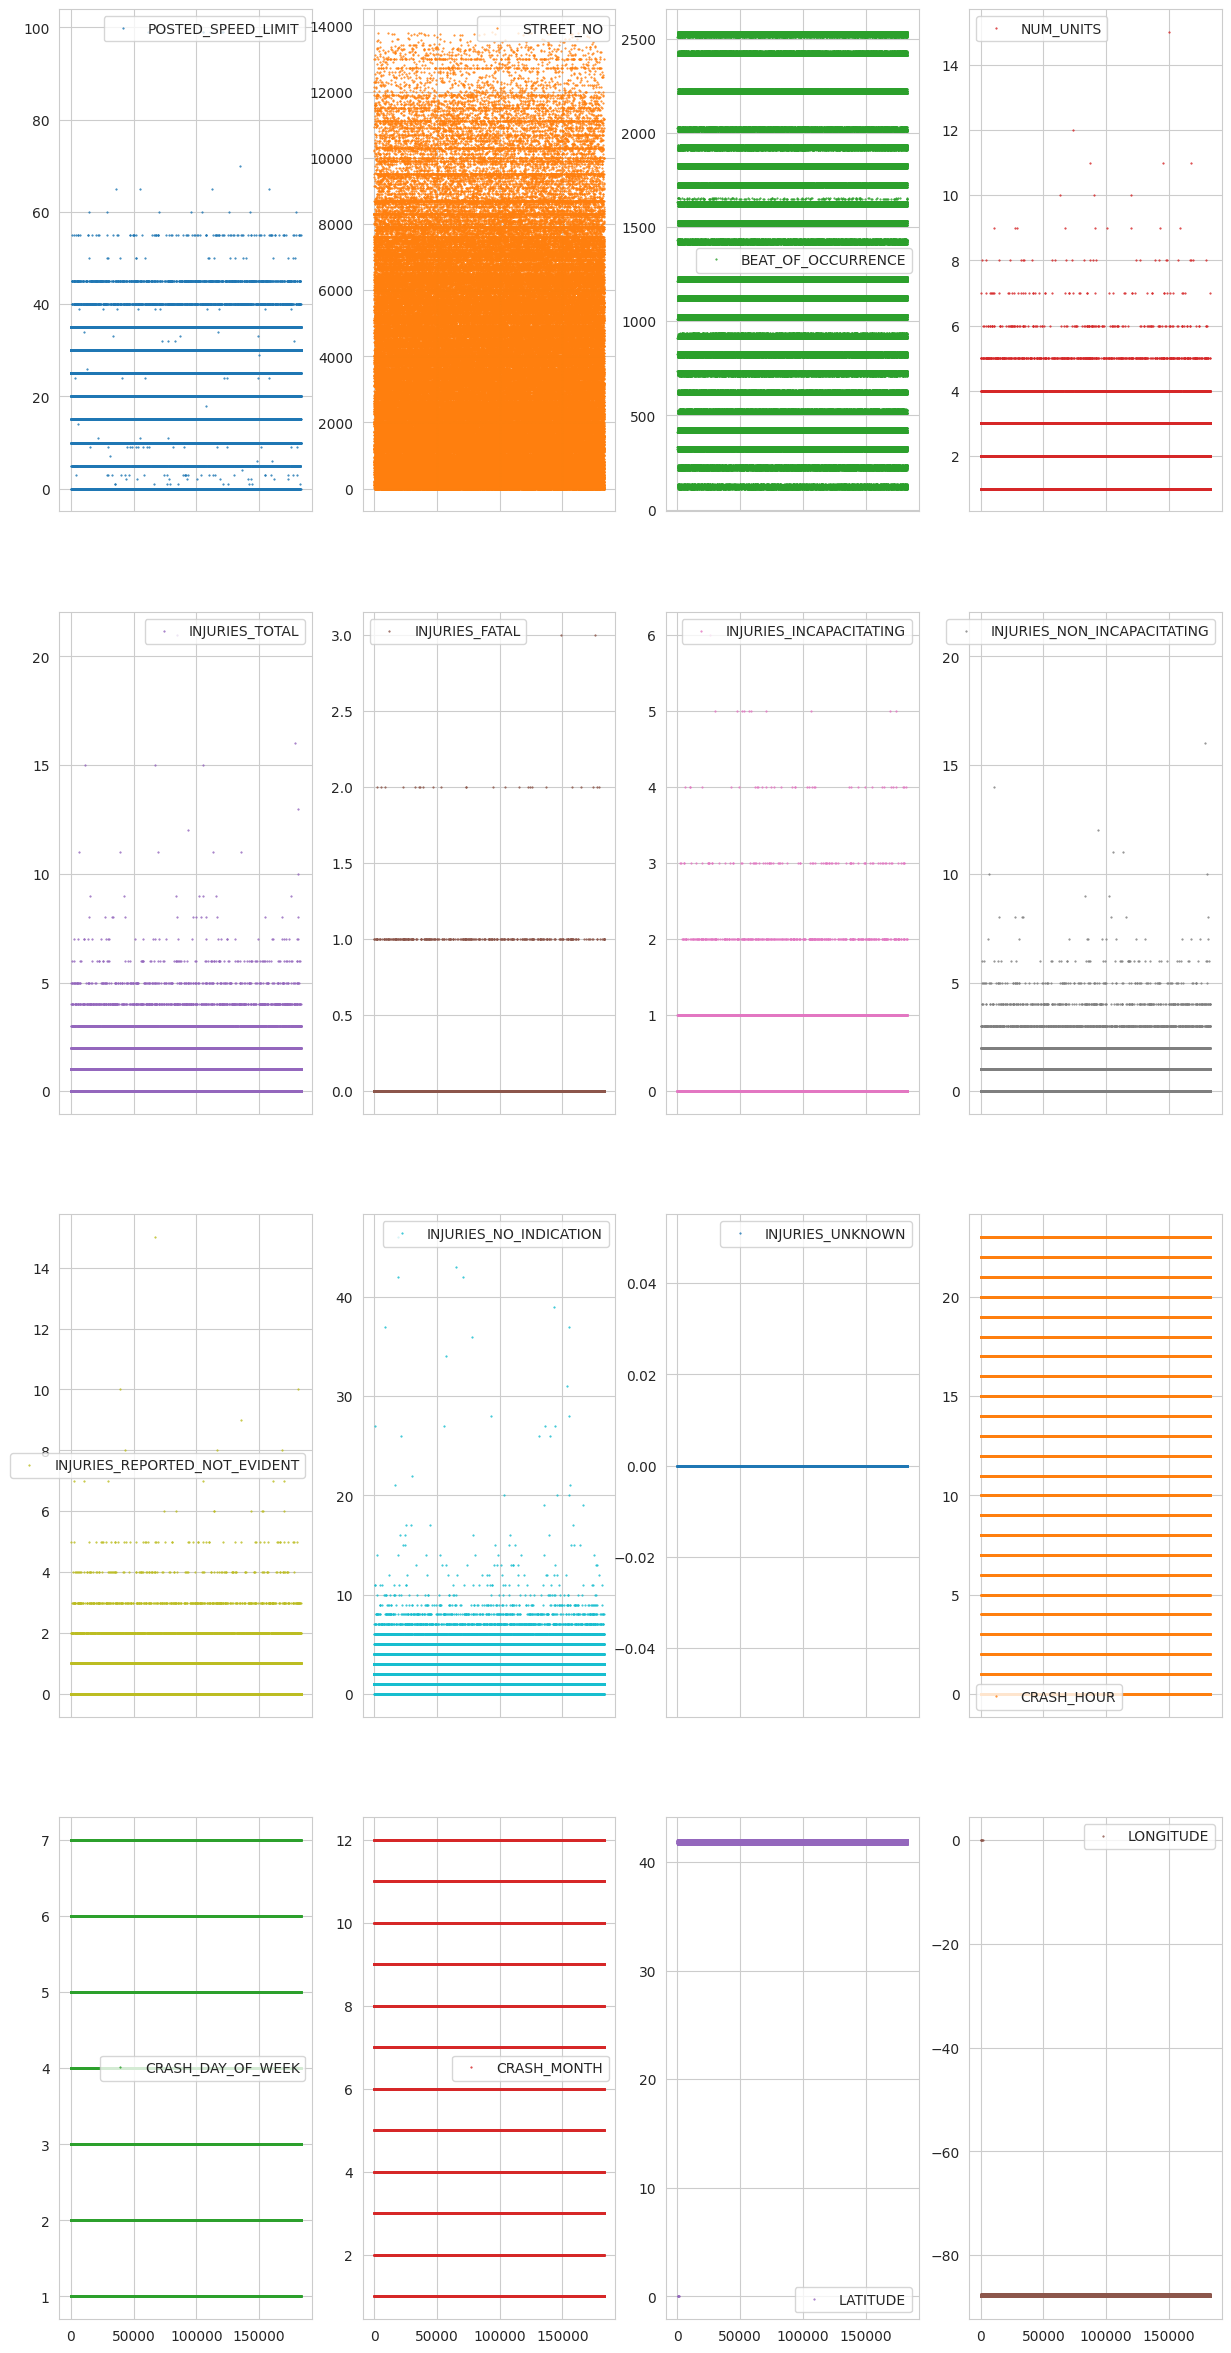

In [ ]:
# Plot all numeric features:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

##Content Investigation

CPU times: user 2.47 s, sys: 194 ms, total: 2.67 s
Wall time: 2.69 s


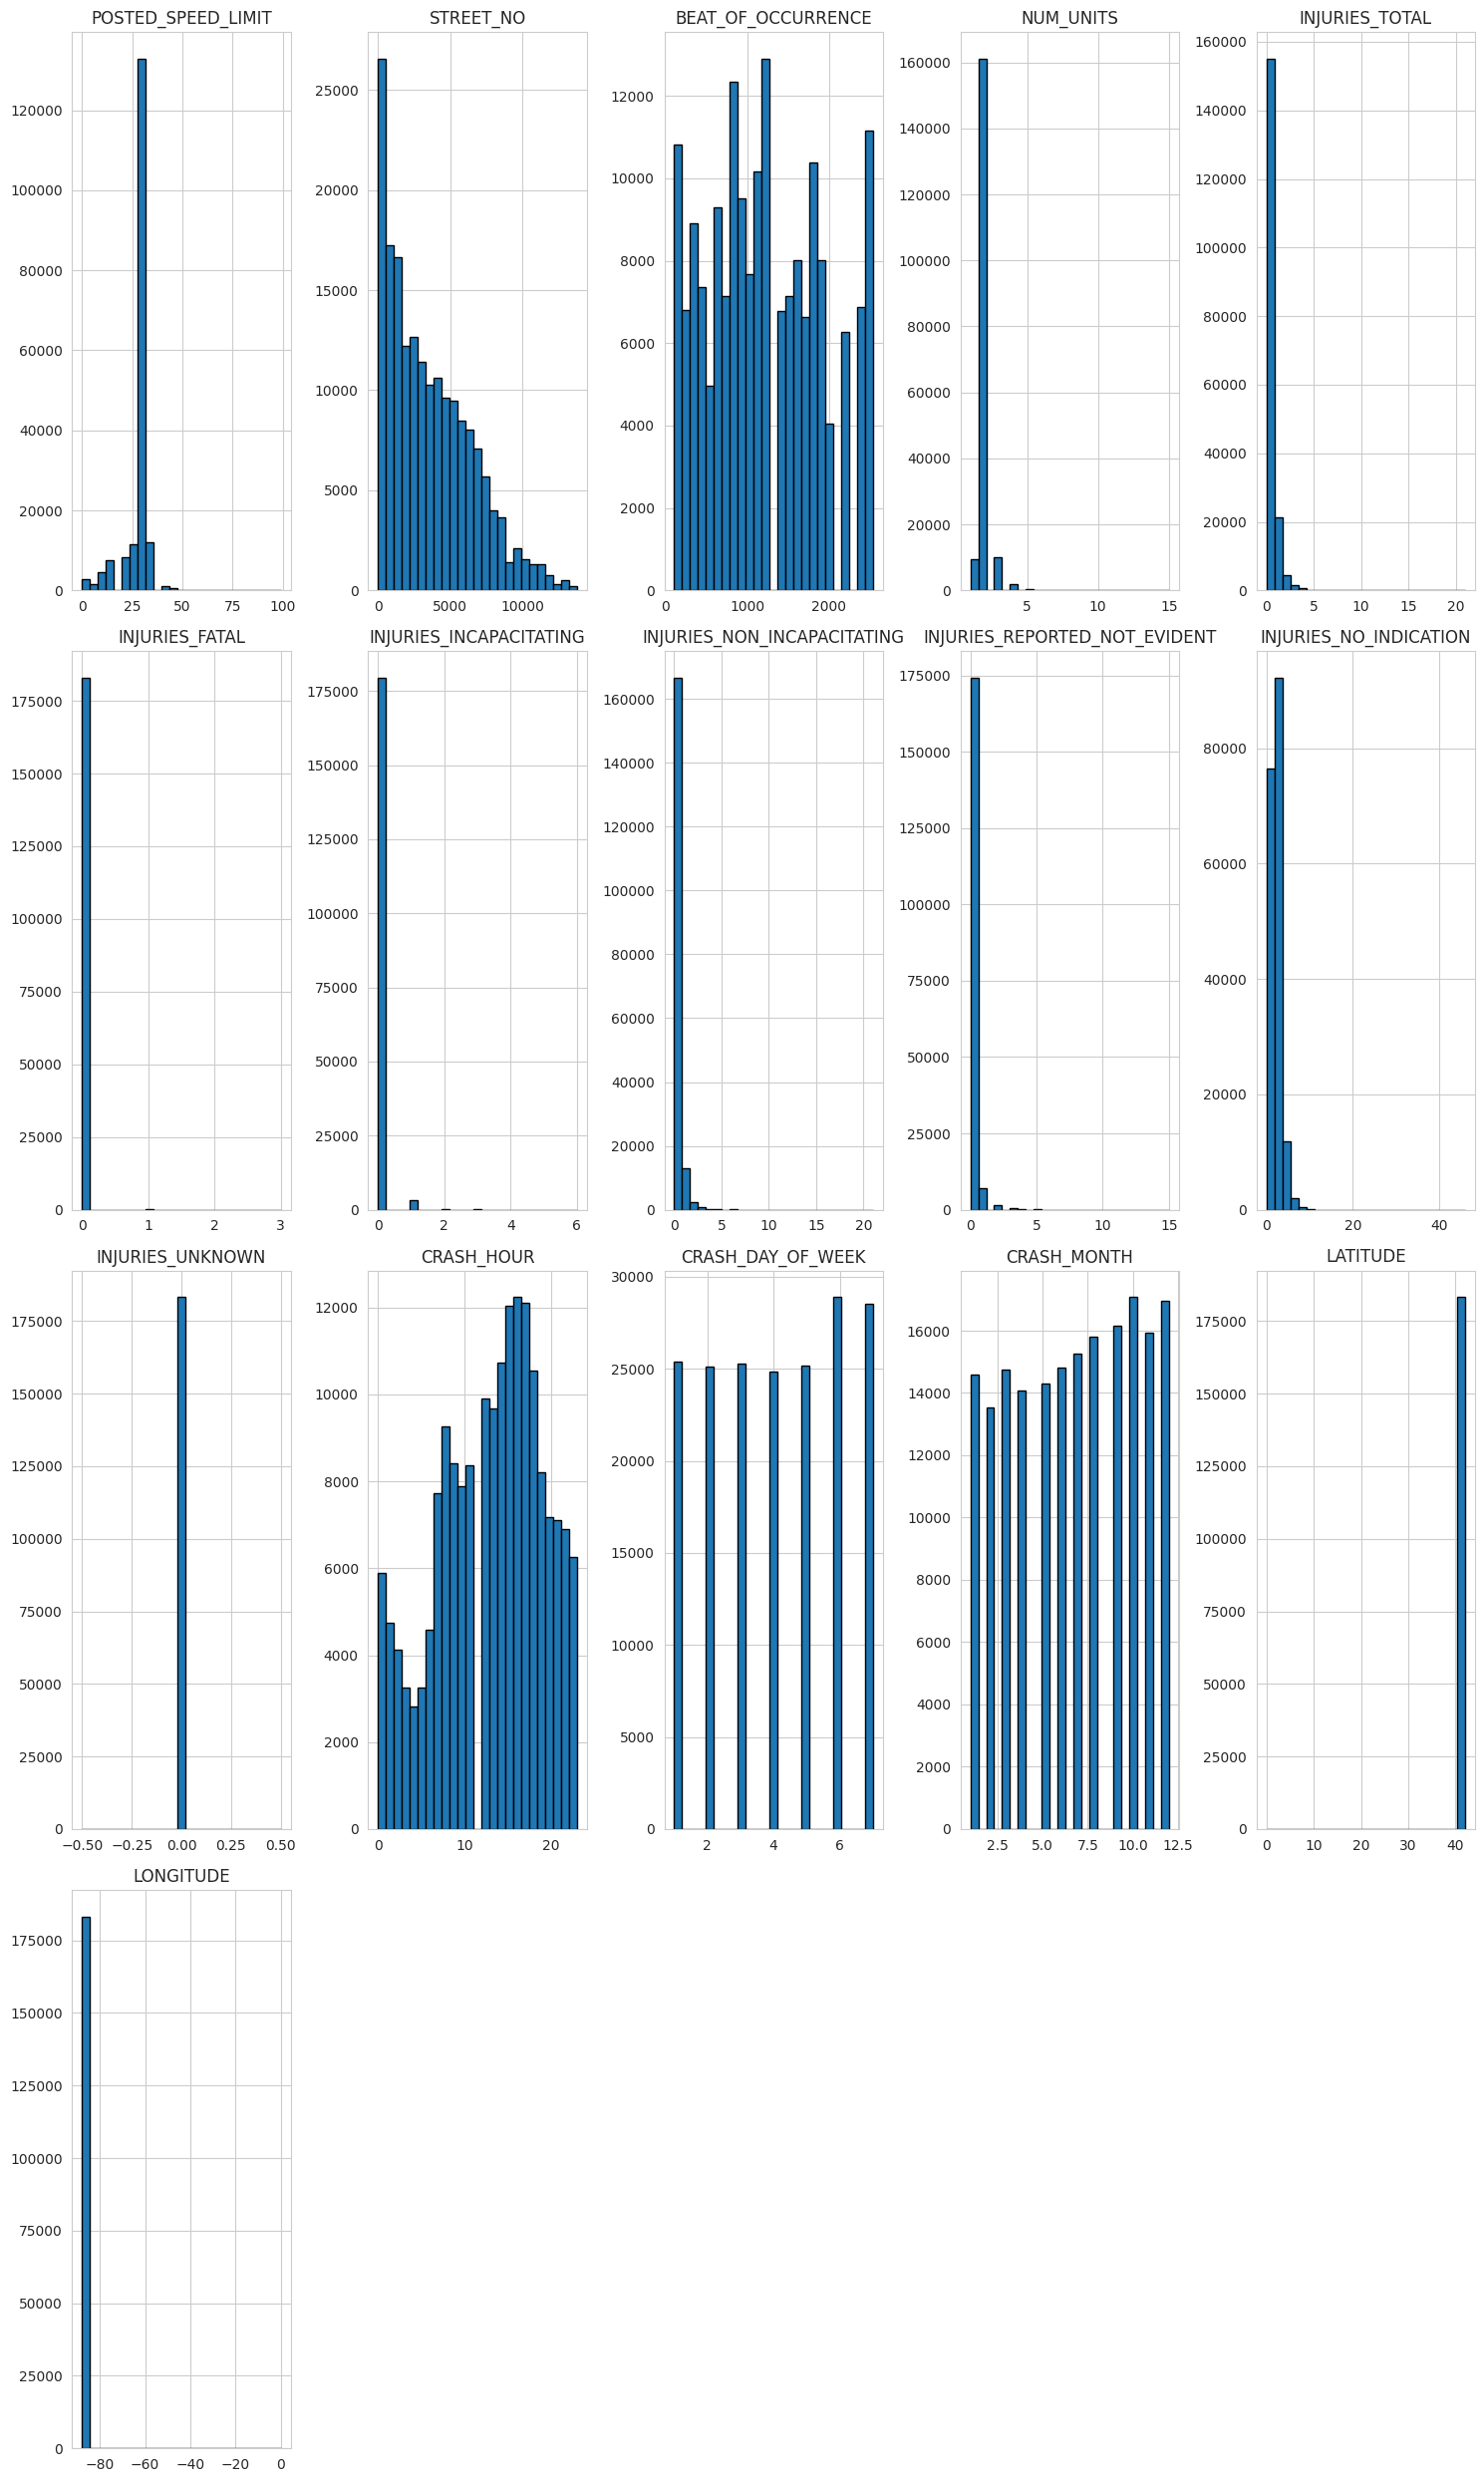

In [ ]:
# Feature Distribution
%%time
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

CRASH_RECORD_ID            0.000868
ROAD_DEFECT                0.000005
MOST_SEVERE_INJURY         0.000005
NUM_UNITS                  0.000005
INJURIES_INCAPACITATING    0.000005
dtype: float64

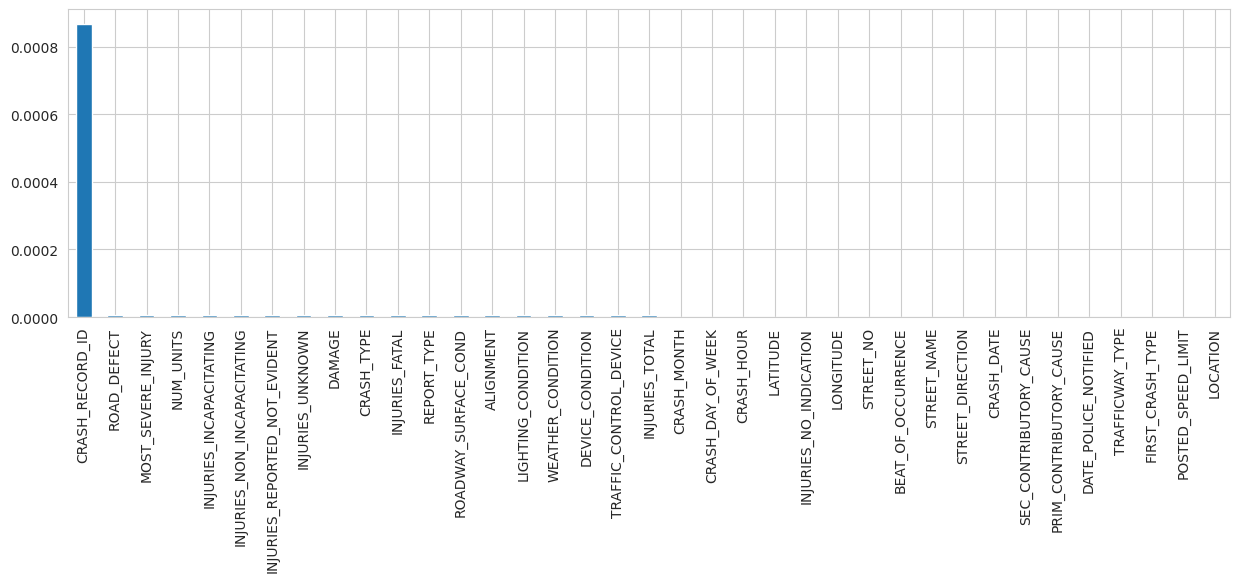

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()
# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)
# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)
# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())
# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

In [ ]:
display(df_freq.head(15))

CRASH_RECORD_ID                  0.000868
ROAD_DEFECT                      0.000005
MOST_SEVERE_INJURY               0.000005
NUM_UNITS                        0.000005
INJURIES_INCAPACITATING          0.000005
INJURIES_NON_INCAPACITATING      0.000005
INJURIES_REPORTED_NOT_EVIDENT    0.000005
INJURIES_UNKNOWN                 0.000005
DAMAGE                           0.000005
CRASH_TYPE                       0.000005
INJURIES_FATAL                   0.000005
REPORT_TYPE                      0.000005
ROADWAY_SURFACE_COND             0.000005
ALIGNMENT                        0.000005
LIGHTING_CONDITION               0.000005
dtype: float64

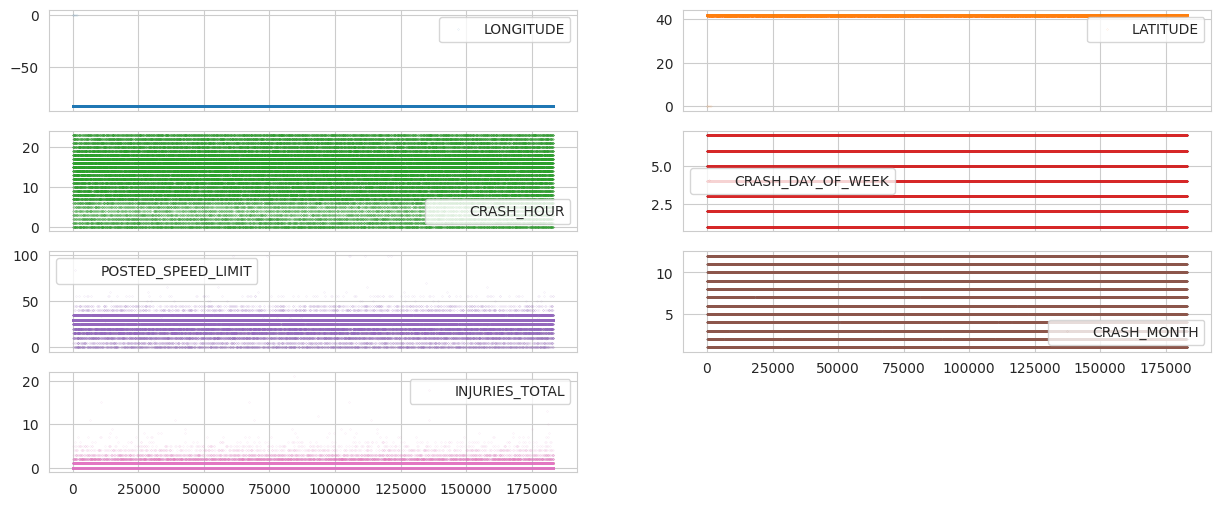

In [ ]:
# Feature Patterns
df_X[["LONGITUDE", "LATITUDE", "CRASH_HOUR","CRASH_DAY_OF_WEEK", "POSTED_SPEED_LIMIT", "CRASH_MONTH","INJURIES_TOTAL"]].plot(

lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1,
figsize=(15, 6));

##Continuous

In [ ]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

CPU times: user 1min, sys: 2.05 s, total: 1min 2s
Wall time: 1min 7s


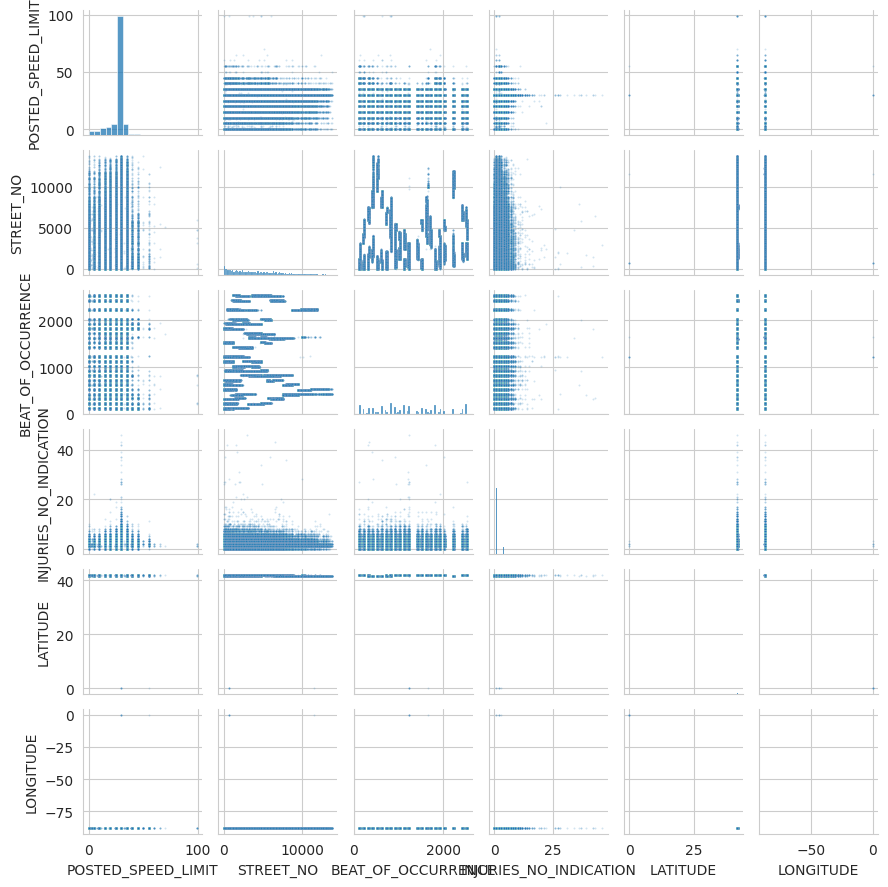

In [ ]:
# Analyze Continuous Features
%%time
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha":0.2});

In [ ]:
g = sns.pairplot(
df_X, plot_kws={'s': 3, 'alpha': 0.2}, hue='LOCATION',
palette='Spectral',
x_vars=['LONGITUDE'],
y_vars='LATITUDE');
g.fig.set_size_inches(15,8)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f77bc5ea8c0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f77bc5e9b40> (for post_execute):


KeyboardInterrupt: 

##Discrete (less than 25 unique values)

In [ ]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(183227, 10)

<Axes: xlabel='NUM_UNITS', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='INJURIES_TOTAL', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='INJURIES_FATAL', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='INJURIES_INCAPACITATING', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='INJURIES_NON_INCAPACITATING', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='INJURIES_REPORTED_NOT_EVIDENT', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='INJURIES_UNKNOWN', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='CRASH_HOUR', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='CRASH_DAY_OF_WEEK', ylabel='CRASH_DAY_OF_WEEK'>

<Axes: xlabel='CRASH_MONTH', ylabel='CRASH_DAY_OF_WEEK'>

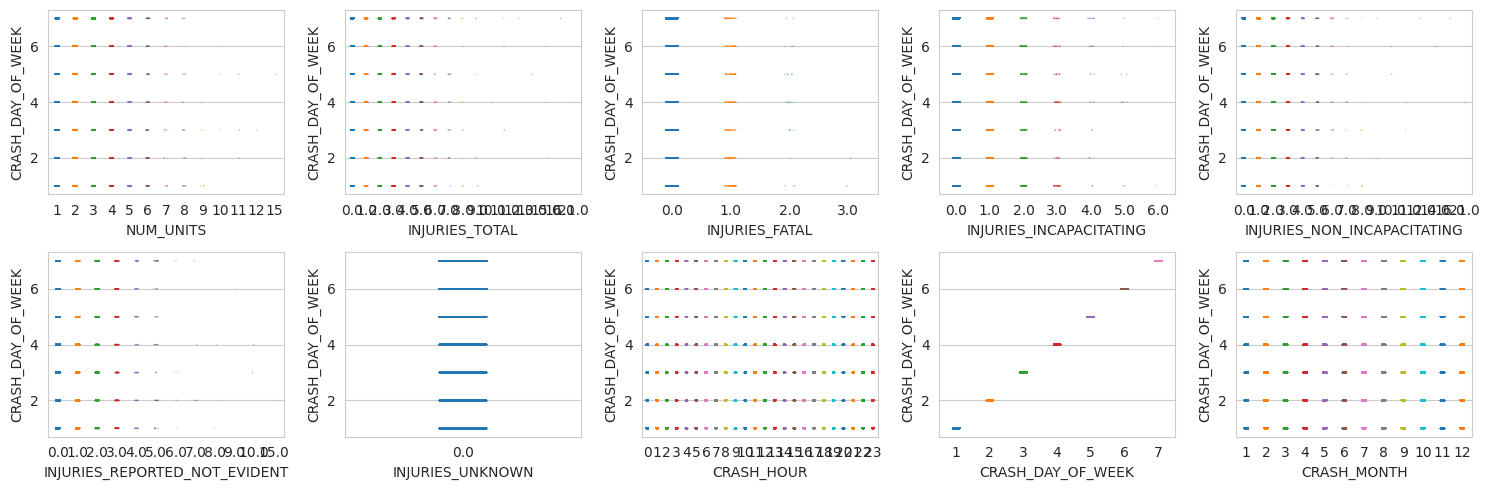

In [ ]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["CRASH_DAY_OF_WEEK"]
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,n_rows * 2.5))
# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10",size=1, alpha=0.5)
  plt.tight_layout();